In [1]:
from rmgpy.species import Species

In [2]:
from rmgpy.molecule.molecule import Atom, Bond, Molecule

In [3]:
from rmgpy.data.rmg import RMGDatabase
from rmgpy import settings
database = RMGDatabase()
database.load(path = settings['database.directory'],
     kineticsFamilies=['R_Addition_MultipleBond'],
     depository=True,
     solvation=True,)

for family in database.kinetics.families.values():
    family.addKineticsRulesFromTrainingSet(thermoDatabase=database.thermo)
for family in database.kinetics.families.values():
    family.fillKineticsRulesByAveragingUp(verbose=True)

In [4]:
def find_reaction_degeneracy(reactants_adj_list,rxn_family_str,
                             num_independent_reactions = 1):
    """
    given:

    reactants_adj_list: a list of adjacency lists of the reactants
    `reaction_family_str`: the string representation of the reaction family
    `num_independent_rxns`: the number of reaction objects expected from generateReactions

    returns:

    a tuple with the total degeneracy and a list of reaction objects
    """
    family = database.kinetics.families[rxn_family_str]
    reactants = [Molecule().fromAdjacencyList(reactants_adj_list[0]),
                 Molecule().fromAdjacencyList(reactants_adj_list[1])] 

    reactions = family.generateReactions(reactants)

    return sum([reaction.degeneracy for reaction in reactions]), reactions


In [5]:
rxn_family_str = 'R_Addition_MultipleBond'
butenyl_adj_list = """
    multiplicity 2
    1 C u0 p0 c0 {2,S} {3,S} {5,S} {6,S}
    2 C u0 p0 c0 {1,S} {4,D} {7,S}
    3 C u1 p0 c0 {1,S} {8,S} {9,S}
    4 C u0 p0 c0 {2,D} {10,S} {11,S}
    5 H u0 p0 c0 {1,S}
    6 H u0 p0 c0 {1,S}
    7 H u0 p0 c0 {2,S}
    8 H u0 p0 c0 {3,S}
    9 H u0 p0 c0 {3,S}
    10 H u0 p0 c0 {4,S}
    11 H u0 p0 c0 {4,S}
    """
pentenyl_adj_list = """
    multiplicity 2
    1 C u0 p0 c0 {2,S} {3,S} {8,S} {9,S}
    2 C u0 p0 c0 {1,S} {4,S} {6,S} {7,S}
    3 C u0 p0 c0 {1,S} {5,D} {10,S}
    4 C u1 p0 c0 {2,S} {11,S} {12,S}
    5 C u0 p0 c0 {3,D} {13,S} {14,S}
    6 H u0 p0 c0 {2,S}
    7 H u0 p0 c0 {2,S}
    8 H u0 p0 c0 {1,S}
    9 H u0 p0 c0 {1,S}
    10 H u0 p0 c0 {3,S}
    11 H u0 p0 c0 {4,S}
    12 H u0 p0 c0 {4,S}
    13 H u0 p0 c0 {5,S}
    14 H u0 p0 c0 {5,S}  
    """

family = database.kinetics.families[rxn_family_str]

# get reaction objects and their degeneracy
pb_degeneracy, pb_reactions = find_reaction_degeneracy([butenyl_adj_list,pentenyl_adj_list],rxn_family_str, num_independent_reactions=4)

# find the correct reaction from the list
asymmetric_product = Molecule().fromAdjacencyList('''
    multiplicity 3
    1 C u0 p0 c0 {2,S} {3,S} {7,S} {10,S}
    2 C u0 p0 c0 {1,S} {5,S} {11,S} {12,S}
    3 C u0 p0 c0 {1,S} {4,S} {13,S} {14,S}
    4 C u0 p0 c0 {3,S} {6,S} {17,S} {18,S}
    5 C u0 p0 c0 {2,S} {8,S} {15,S} {16,S}
    6 C u0 p0 c0 {4,S} {9,D} {19,S}
    7 C u1 p0 c0 {1,S} {22,S} {23,S}
    8 C u1 p0 c0 {5,S} {20,S} {21,S}
    9 C u0 p0 c0 {6,D} {24,S} {25,S}
    10 H u0 p0 c0 {1,S}
    11 H u0 p0 c0 {2,S}
    12 H u0 p0 c0 {2,S}
    13 H u0 p0 c0 {3,S}
    14 H u0 p0 c0 {3,S}
    15 H u0 p0 c0 {5,S}
    16 H u0 p0 c0 {5,S}
    17 H u0 p0 c0 {4,S}
    18 H u0 p0 c0 {4,S}
    19 H u0 p0 c0 {6,S}
    20 H u0 p0 c0 {8,S}
    21 H u0 p0 c0 {8,S}
    22 H u0 p0 c0 {7,S}
    23 H u0 p0 c0 {7,S}
    24 H u0 p0 c0 {9,S}
    25 H u0 p0 c0 {9,S}
    ''')

pb_reaction = next((reaction for reaction in pb_reactions if reaction.products[0].isIsomorphic(asymmetric_product)),None)



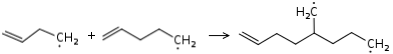

In [6]:
pb_reaction

In [7]:
family.addAtomLabelsForReaction(pb_reaction)

Exception: Something wrong with products that RMG cannot find a match!

In [8]:
pb_reaction.template

['Cds-CsH_Cds-HH', 'CsJ-CsHH']